In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
train['source']='train'
test['source']='test'
df=pd.concat([train,test],ignore_index=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [4]:
#statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
#datatype of attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [6]:
#check unique value
df.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [8]:
#getting all categorical columns
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'source']

In [9]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')

In [10]:
#checking unique values
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int6

In [11]:
#filling mean values
item_weight_mean=df.pivot_table(values="Item_Weight",index='Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [12]:
miss_bool=df['Item_Weight'].isnull()
miss_bool

0        False
1        False
2        False
3        False
4        False
         ...  
14199    False
14200    False
14201    False
14202    False
14203    False
Name: Item_Weight, Length: 14204, dtype: bool

In [13]:
for i,item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i]=item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i]=np.mean(df['Item_Weight'])

In [14]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [15]:
outlet_size_mode=df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x : x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:
miss_bool=df['Outlet_Size'].isnull()
df.loc[miss_bool,'Outlet_Size']=df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [17]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [18]:
sum(df['Item_Visibility']==0)

879

In [19]:
#Replacing 0s
df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace=True)

In [20]:
sum(df['Item_Visibility']==0)

0

In [21]:
#combine item fat content
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [22]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

Creating New Attributes

In [23]:
df['New_Item_Type']=df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0        FD
1        DR
2        FD
3        FD
4        NC
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: New_Item_Type, Length: 14204, dtype: object

In [24]:
df['New_Item_Type']=df['New_Item_Type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

In [25]:
df.loc[df['New_Item_Type']=='Non-Consumable','Item_Fat_Content']='Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [26]:
#create small values for estalishment year
df['Outlet_Years']=2013-df['Outlet_Establishment_Year']

In [27]:
df['Outlet_Years']

0        14
1         4
2        14
3        15
4        26
         ..
14199    16
14200     4
14201    11
14202     6
14203    11
Name: Outlet_Years, Length: 14204, dtype: int64

In [28]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,14
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,Food,15
4,NCD19,8.93,Non-Edible,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,26


EDA

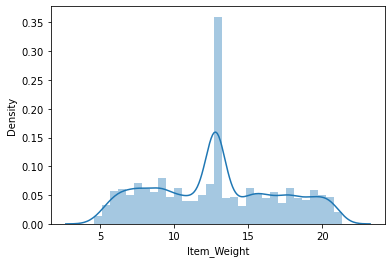

In [29]:
sns.distplot(df['Item_Weight'])
plt.show()

Mean is higher since we have done pre-processing

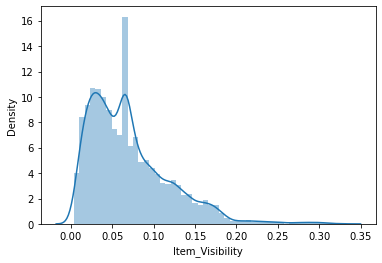

In [30]:
sns.distplot(df['Item_Visibility'])
plt.show()

Left Skewed

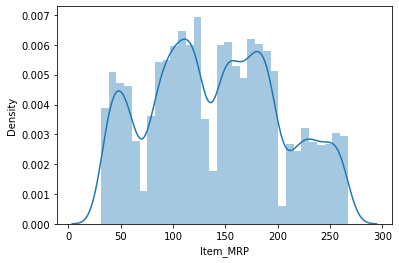

In [31]:
sns.distplot(df['Item_MRP'])
plt.show()

varible prices

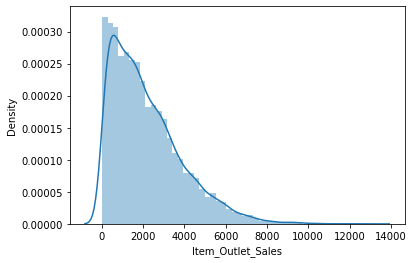

In [32]:
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

Left Skewed

In [33]:
#log transformation
df['Item_Outlet_Sales']=np.log(1+df['Item_Outlet_Sales'])

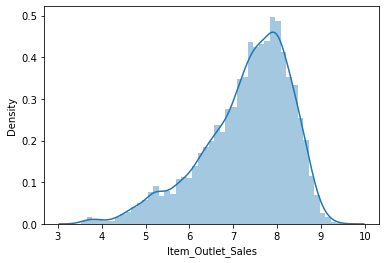

In [34]:
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

better distriution as compared to before

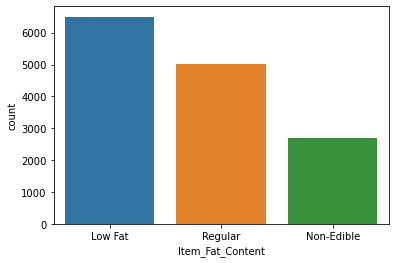

In [35]:
sns.countplot(df['Item_Fat_Content'])
plt.show()

Majorority of products are LF

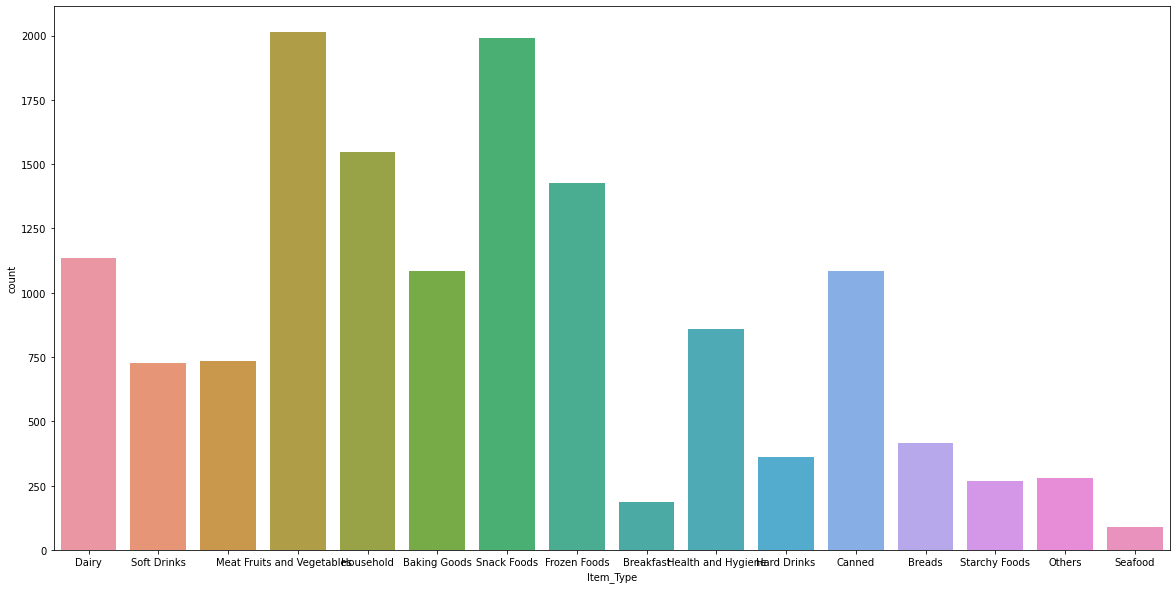

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(df['Item_Type'])
plt.show()

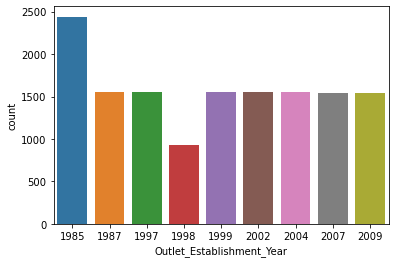

In [37]:
sns.countplot(df['Outlet_Establishment_Year'])
plt.show()

In 1985 more numer of outlets were established and in 1998 least number of outlets were estalished

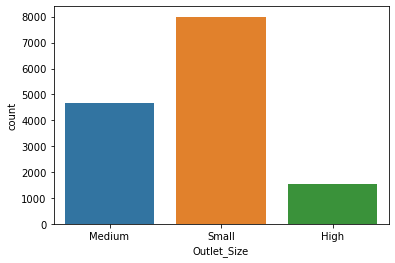

In [38]:
sns.countplot(df['Outlet_Size'])
plt.show()

More Small outlets and less high outlets

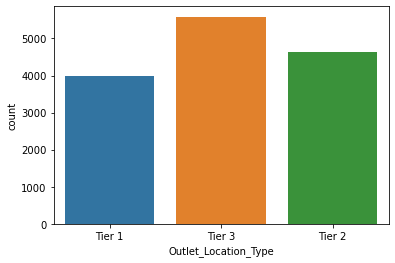

In [39]:
sns.countplot(df['Outlet_Location_Type'])
plt.show()

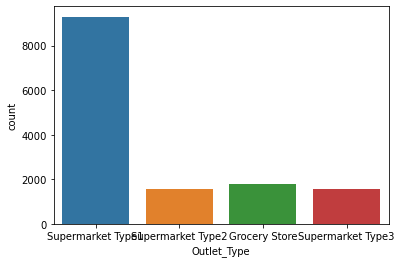

In [40]:
sns.countplot(df['Outlet_Type'])
plt.show()

Supermarket type 1 is maximum

Correlation

In [41]:
corr=df.corr()

In [42]:
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.015313,0.033002,0.000462,0.008476,-0.000462
Item_Visibility,-0.015313,1.000000,-0.008790,-0.088598,-0.202467,0.088598
Item_MRP,0.033002,-0.008790,1.000000,0.000141,0.509886,-0.000141
Outlet_Establishment_Year,0.000462,-0.088598,0.000141,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.008476,-0.202467,0.509886,0.077032,1.000000,-0.077032
Outlet_Years,-0.000462,0.088598,-0.000141,-1.000000,-0.077032,1.000000


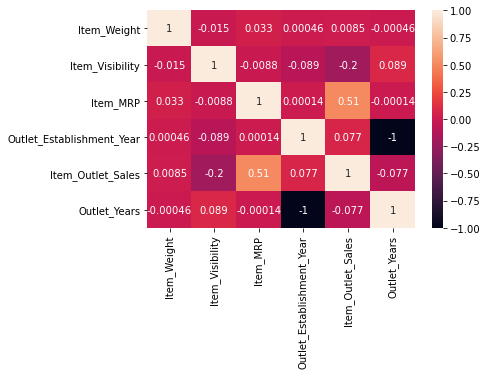

In [43]:
sns.heatmap(corr,annot=True)
plt.show()

In [44]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'New_Item_Type',
       'Outlet_Years'],
      dtype='object')

In [45]:
cols_to_be_checked=["Item_MRP","Item_Visibility","Item_Weight"]
for col in df.skew().index:
    if col in cols_to_be_checked:
        print("Skewness of column {} is: {}".format(col,df.skew().loc[col]))

Skewness of column Item_Weight is: 0.1113138995701358
Skewness of column Item_Visibility is: 1.320682723150534
Skewness of column Item_MRP is: 0.13072836040225863


In [46]:
import numpy as np
df.skew()
for col in df.skew().index:
    if col in cols_to_be_checked:
        if df.skew().loc[col]>0.5:
            df[col]=np.sqrt(df[col])
        if df.skew().loc[col]<-0.5:
            df[col]=np.cbrt(df[col])

In [47]:
cols_to_be_checked=["Item_MRP","Item_Visibility","Item_Weight"]
for col in df.skew().index:
    if col in cols_to_be_checked:
        print("Skewness of column {} is: {}".format(col,df.skew().loc[col]))

Skewness of column Item_Weight is: 0.1113138995701358
Skewness of column Item_Visibility is: 0.4175715480875312
Skewness of column Item_MRP is: 0.13072836040225863


In [48]:
##Label Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le=LabelEncoder()

In [51]:
cols=['Outlet_Identifier','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for col in cols:
    df[col]=le.fit_transform(df[col])

SPLIT

In [52]:
df.drop(['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [53]:
df_train=df.loc[df["source"]=="train"]
df_test=df.loc[df["source"]=="test"]
df_test.reset_index(drop=True,inplace=True)

In [54]:
#Lets drop the Item_Outlet_Sales from test dataset as that is the o/p variable that needs to be predicted
df_test.drop(columns=["Item_Outlet_Sales"],inplace=True)

In [55]:
#lets drop source column from df_train and df_test
df_train.drop(columns=["source"],inplace=True)
df_test.drop(columns=["source"],inplace=True)

In [56]:
#seprating input and output from df_train
df_x=df_train.drop(columns=["Item_Outlet_Sales"])
y=df_train[["Item_Outlet_Sales"]]

In [57]:
#Lets bring every column to common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [58]:
print(x.shape,y.shape)

(8523, 10) (8523, 1)


Model Training

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
def train(model,x,y):
    model.fit(x,y)
    pred=model.predict(x)
    cv_score=cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=5)
    cv_score=np.abs(np.mean(cv_score))
    print("model report")
    print("MSE",mean_squared_error(y,pred))
    print(cv_score,r2_score(y,pred))

In [63]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model=LinearRegression()
train(model,x,y)

model report
MSE 0.44106933083731464
0.4422705489230139 0.5719989568415137


In [64]:
from sklearn.model_selection import GridSearchCV
alpha = [0.001, 0.01, 0.1, 1, 10]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x, y)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Params:  {'alpha': 10}


In [65]:
train(Ridge(alpha=10),x,y)

model report
MSE 0.4410708996524052
0.4422708894011465 0.5719974345082923


In [66]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Lasso(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x, y)
print('Best params: ', grid_result.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best params:  {'alpha': 0.001}


In [67]:
model=Lasso(alpha=0.001)
train(model,x,y)

model report
MSE 0.44108345770337914
0.44226542837239713 0.5719852485353826


In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
dtc=DecisionTreeRegressor()
train(dtc,x,y)

model report
MSE 5.5534030638578795e-34
0.579322637836898 1.0


In [70]:
from sklearn.svm import SVR
svr=SVR()
param={'kernel':['linear','rbf','poly','sigmoid']}
gd=GridSearchCV(svr,param,cv=5)
gd.fit(x,y)
print(gd.best_params_)

{'kernel': 'rbf'}


In [72]:
svr=SVR(kernel='rbf')
train(svr,x,y)

model report
MSE 0.2573792838212745
0.2864875299959859 0.7502465162250856


In [73]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [74]:
param={'n_neighbors':[7,5,9,11,15],'weights':['uniform','distance'],'algorithm':['auto','bell_tree','kd_tree','brute']}
gd=GridSearchCV(knn,param,cv=5)
gd.fit(x,y)
print(gd.best_params_)

{'algorithm': 'brute', 'n_neighbors': 15, 'weights': 'distance'}


In [75]:
knn=KNeighborsRegressor(n_neighbors=15,weights='distance',algorithm='brute')

In [76]:
train(knn,x,y)

model report
MSE 5.201030486454748e-14
0.3193011339109376 0.9999999999999495


In [77]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
train(RandomForestRegressor(n_estimators=500),x,y)

model report
MSE 0.04122815982077944
0.30853061890679845 0.9599933747891737


In [82]:
from xgboost import XGBRegressor

In [83]:
xgb=XGBRegressor()
train(xgb,x,y)

model report
MSE 0.13400139376704495
0.31165955237712556 0.8699688862789227


In [85]:
##difference between cross val score and r2 score is least in lasso hence saving Lasso

In [86]:
import pickle
filename='bigdata_prediction.pkl'
pickle.dump(Lasso(alpha=0.001),open(filename,'wb'))

In [87]:
l=Lasso(alpha=0.001)
l.fit(x,y)
df=l.predict(df_test)

In [88]:
df

array([ 60.4706077 ,  51.03108803, 128.17603576, ...,  66.24234702,
       116.79988165,  46.12104744])

In [91]:
data=pd.DataFrame(data=df)

In [92]:
data

,0
0,60.470608
1,51.031088
2,128.176036
3,86.023773
4,123.522505
...,...
5676,77.199381
5677,94.193899
5678,66.242347
5679,116.799882


In [94]:
data.to_csv('Predicted_bigdata_sales_test.csv')